In [1]:
import numpy             as np
import pandas            as pd

from utils import (
    Adblocker,
    compare_CDF,
    barplot,
    pieplot,
    get_99p,
    generate_table
)

In [2]:
brave       = Adblocker(filename='data/brave_timings.json', color='#ff5500', label='Brave')
cliqz       = Adblocker(filename='data/cliqz_timings.json', color='#00aff0', label='Cliqz')
ublock      = Adblocker(filename='data/ublock_timings.json', color='#800000', label='uBlock Origin')
duck        = Adblocker(filename='data/duckduckgo_timings.json', color='#58b792', label='DuckDuckGo')
abp         = Adblocker(filename='data/adblockplus_timings.json', color='#c70d2c', label='Adblock Plus')
url         = Adblocker(filename='data/url_timings.json', color='#1f3757', label='URL baseline')
tldts       = Adblocker(filename='data/tldts_timings.json', color='#98b3be', label='Tldts baseline')
adblockfast = Adblocker(filename='data/adblockfast_timings.json', color='#f10c2b', label='AdblockFast')

### Composition of Requests

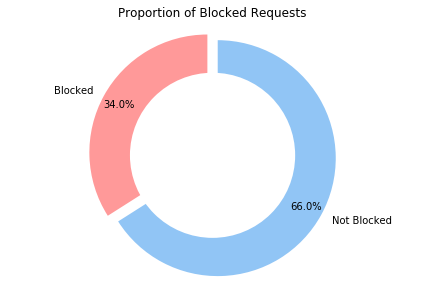

In [3]:
pieplot(cliqz, ublock, duck, brave, abp)

### Looking at all requests

#### **Cliqz vs uBlock vs Adblock Plus vs Brave vs DuckDuckGo**

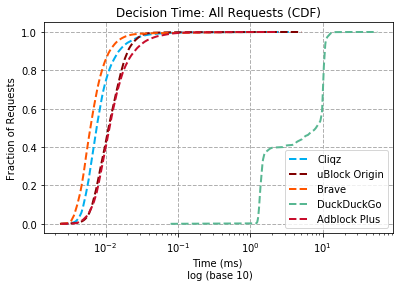

In [4]:
compare_CDF(
    cliqz,
    ublock,
    brave,
    duck,
    abp,
    attr="all",
    log_x=True,
    log_y=False,
    title='Decision Time: All Requests (CDF)'
)

#### **Cliqz vs uBlock vs Adblock Plus vs Brave vs DuckDuckGo** + Baselines

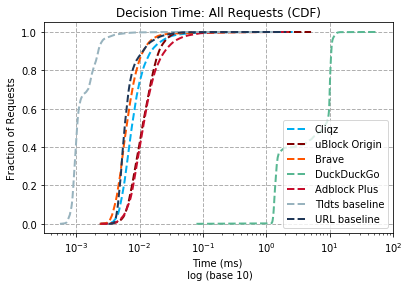

In [5]:
compare_CDF(
    cliqz,
    ublock,
    brave,
    duck,
    abp,
    tldts,
    url,
    attr="all",
    log_x=True,
    log_y=False,
    title='Decision Time: All Requests (CDF)'
)

#### **Cliqz vs AdblockFast**

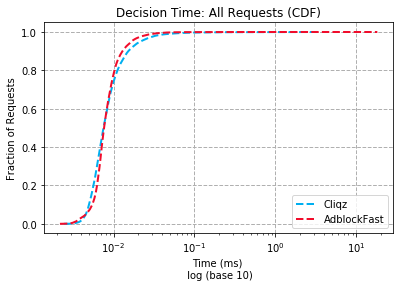

In [6]:
compare_CDF(
    cliqz,
    adblockfast,
    attr="all",
    log_x=True,
    log_y=False,
    title='Decision Time: All Requests (CDF)'
)

Interestingly, although AdblockFast is not a full-fledged blocker, and only uses 7 RegExp, Cliqz still perform as well.

#### Individual Comparisons
##### 1. **Cliqz vs uBlock**

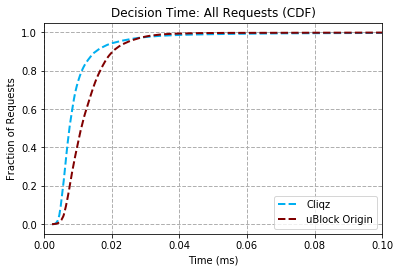

In [7]:
compare_CDF(
    cliqz,
    ublock,
    attr="all", 
    log_x=False, 
    log_y=False, 
    xlim=(0, 0.10), 
    title='Decision Time: All Requests (CDF)'
)

##### **2. Cliqz vs AdblockPlus**

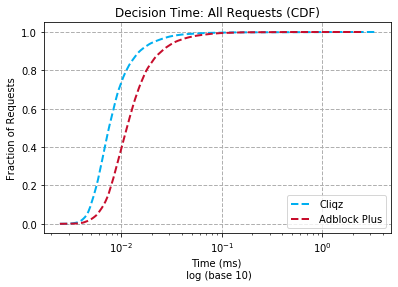

In [8]:
compare_CDF(
    cliqz,
    abp,
    attr="all",
    log_x=True,
    log_y=False,
    title='Decision Time: All Requests (CDF)'
)

### Comparing adblockers on requests that are NOT blocked
**Reminder**: This is the more common case: 80% of the requests are not blocked

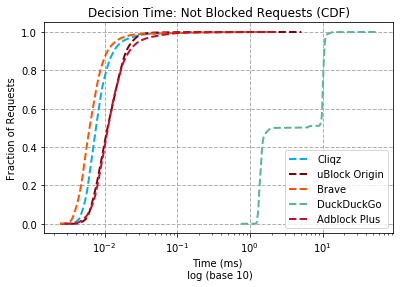

In [9]:
compare_CDF(
    cliqz,
    ublock,
    brave,
    duck,
    abp,
    attr="not_blocked",
    log_x=True,
    log_y=False,
    title='Decision Time: Not Blocked Requests (CDF)'
)

### Comparing adblockers on requests that are blocked

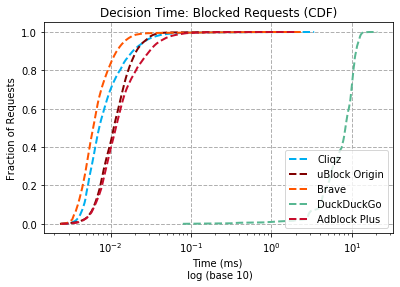

In [10]:
compare_CDF(
    cliqz,
    ublock,
    brave,
    duck,
    abp,
    attr="blocked",
    log_x=True,
    log_y=False,
    title='Decision Time: Blocked Requests (CDF)'
)

#### 99th percentile

In [11]:
p99 = pd.DataFrame({
    'request_type': ['_all', 'not_blocked', 'blocked'],
    'cliqz': get_99p(cliqz),
    'ublock': get_99p(ublock),
    'brave': get_99p(brave),
    'duck': get_99p(duck),
    'abp': get_99p(abp),
})

p99['ublock_vs_cliqz'] = p99.ublock / p99.cliqz
p99['brave_vs_cliqz'] = p99.brave / p99.cliqz
p99['duck_vs_cliqz'] = p99.duck / p99.cliqz
p99['abp_vs_cliqz'] = p99.abp / p99.cliqz

In [12]:
p99

,request_type,cliqz,ublock,brave,duck,abp,ublock_vs_cliqz,brave_vs_cliqz,duck_vs_cliqz,abp_vs_cliqz
0,_all,0.047663,0.035182,0.027854,12.594179,0.076995,0.738141,0.584395,264.233871,1.615404
1,not_blocked,0.043227,0.034014,0.031603,11.960517,0.077617,0.786869,0.731094,276.690888,1.795568
2,blocked,0.050730,0.036822,0.023256,13.131594,0.076321,0.725843,0.458427,258.852632,1.504455


#### Medians

In [13]:
medians = pd.DataFrame({
    'request_type': ['_all', 'not_blocked', 'blocked'],
    'cliqz': list(map(lambda x: np.median(x), [cliqz.all.raw, cliqz.not_blocked.raw, cliqz.blocked.raw])),
    'ublock': list(map(lambda x: np.median(x), [ublock.all.raw, ublock.not_blocked.raw, ublock.blocked.raw])),
    'brave': list(map(lambda x: np.median(x), [brave.all.raw, brave.not_blocked.raw, brave.blocked.raw])),
    'duck': list(map(lambda x: np.median(x), [duck.all.raw, duck.not_blocked.raw, duck.blocked.raw])),
    'abp': list(map(lambda x: np.median(x), [abp.all.raw, abp.not_blocked.raw, abp.blocked.raw]))

})


In [14]:
medians['ublock_vs_cliqz'] = medians.ublock / medians.cliqz
medians['brave_vs_cliqz'] = medians.brave / medians.cliqz
medians['duck_vs_cliqz'] = medians.duck / medians.cliqz
medians['abp_vs_cliqz'] = medians.abp / medians.cliqz

In [15]:
medians

,request_type,cliqz,ublock,brave,duck,abp,ublock_vs_cliqz,brave_vs_cliqz,duck_vs_cliqz,abp_vs_cliqz
0,_all,0.007496,0.010978,0.006168,8.044320,0.011308,1.464514,0.822839,1073.148346,1.508538
1,not_blocked,0.007620,0.011009,0.006223,2.164159,0.011163,1.444751,0.816667,284.010367,1.464961
2,blocked,0.007197,0.010934,0.006062,8.311366,0.011610,1.519244,0.842295,1154.837571,1.613172


In [16]:
for request_type in ['_all', 'not_blocked', 'blocked']:
    print('Request type', request_type)
    print(generate_table(p99, medians, request_type=request_type))

Request type _all

|               | 99% OF REQUESTS              | MEDIAN                       |
| ------------- | ---------------------------- | ---------------------------- |
| **Cliqz**     | **0.048ms**                  | **0.007ms**                  |
| uBlock Origin | 0.035ms (**0.7x slower**)    | 0.011ms (**1.5x slower**)    |
| Adblock Plus  | 0.077ms (**1.6x slower**)    | 0.011ms (**1.5x slower**)    |
| Brave         | 0.028ms (**0.6x slower**)   | 0.006ms (**0.8x slower**)    |
| DuckDuckGo    | 12.594ms (**264.2x slower**) | 8.044ms (**1073.1x slower**)  |
    
Request type not_blocked

|               | 99% OF REQUESTS              | MEDIAN                       |
| ------------- | ---------------------------- | ---------------------------- |
| **Cliqz**     | **0.043ms**                  | **0.008ms**                  |
| uBlock Origin | 0.034ms (**0.8x slower**)    | 0.011ms (**1.4x slower**)    |
| Adblock Plus  | 0.078ms (**1.8x slower**)    | 0.011ms (**1.5x slowe

## Serialization and Deserialization timings

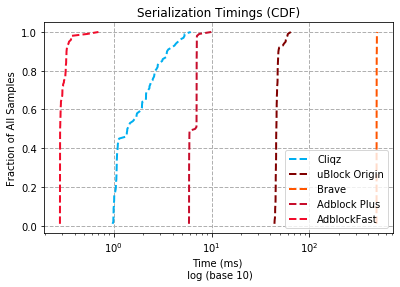

In [17]:
compare_CDF(
    cliqz,
    ublock,
    brave,
    abp,
    adblockfast,
    attr="serializationTimings",
    log_x=True,
    log_y=False,
    y_label="Fraction of All Samples",
    title='Serialization Timings (CDF)'
)

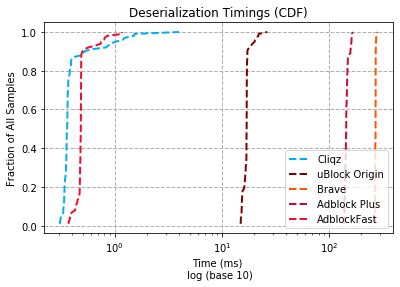

In [18]:
compare_CDF(
    cliqz, 
    ublock, 
    brave, 
    abp, 
    adblockfast,
    attr="deserializationTimings", 
    log_x=True, 
    log_y=False, 
    y_label="Fraction of All Samples", 
    title='Deserialization Timings (CDF)'
)

In [19]:
def compute_loading_medians(field, *adblockers):
    return pd.DataFrame({
        'adblocker': [adblocker.label for adblocker in adblockers],
        field: [np.median(getattr(adblocker, field).raw) for adblocker in adblockers],
    })

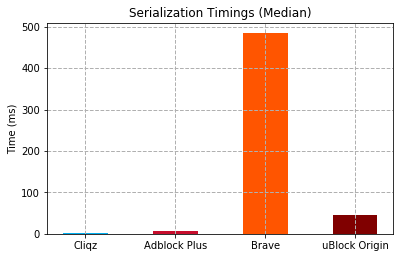

In [20]:
serialization_medians = compute_loading_medians('serializationTimings', cliqz, abp, brave, ublock)
barplot(
    serialization_medians, 
    'serializationTimings',
    title='Serialization Timings (Median)',
    ylabel="Time (ms)", 
    color=[cliqz.color, abp.color, brave.color, ublock.color], 
    save=True
)

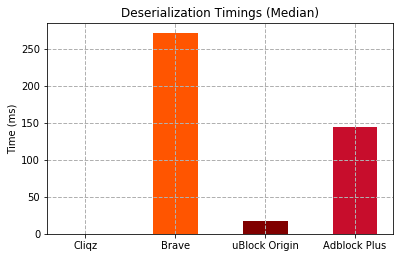

In [21]:
deserialization_medians = compute_loading_medians('deserializationTimings', cliqz, brave, ublock, abp)
barplot( 
    deserialization_medians, 
    'deserializationTimings', 
    ylabel="Time (ms)",
    title='Deserialization Timings (Median)',
    color=[cliqz.color, brave.color, ublock.color, abp.color], 
    save=True
)

In [22]:
deserialization_medians

,adblocker,deserializationTimings
0,Cliqz,0.359295
1,Brave,271.456332
2,uBlock Origin,17.000704
3,Adblock Plus,144.437919


## Serialized Size

In [23]:
size_medians = pd.DataFrame({
    'adblocker': [ublock.label, cliqz.label, abp.label, brave.label],
    'Cache Size': [ublock.cacheSize, cliqz.cacheSize, abp.cacheSize, brave.cacheSize]
})

size_medians['Cache Size'] /= (10**6)

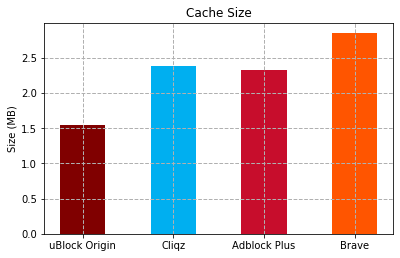

In [24]:
barplot(
    size_medians, 
    'Cache Size', 
    ylabel="Size (MB)", 
    color=[ublock.color, cliqz.color, abp.color, brave.color], 
    save=True
)

### Memory Usage

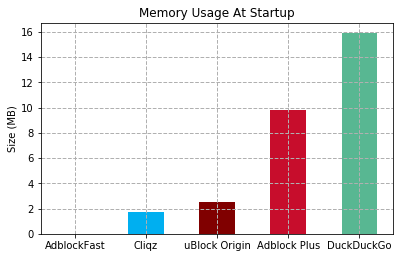

In [25]:
memory_medians = pd.DataFrame({
    'adblocker': [adblockfast.label, cliqz.label, ublock.label, abp.label, duck.label],
    'Memory Usage at Startup': [0.0013, 1.745, 2.525, 9.838, 15.911],
})


barplot(
    memory_medians, 
    'Memory Usage at Startup', 
    ylabel="Size (MB)", 
    color=[adblockfast.color, cliqz.color, ublock.color, abp.color, duck.color], 
    save=True
)

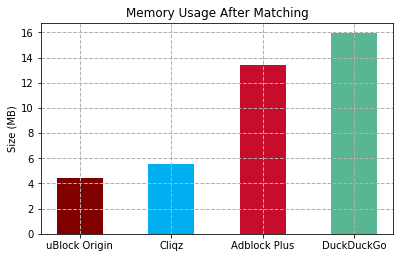

In [26]:
memory_medians = pd.DataFrame({
    'adblocker': [ublock.label, cliqz.label, abp.label, duck.label],
    'Memory Usage after matching': [4.450, 5.575, 13.407, 15.962]
})


barplot(
    memory_medians, 
    'Memory Usage after matching', 
    ylabel="Size (MB)", 
    color=[ublock.color, cliqz.color, abp.color, duck.color], 
    save=True
)

### Time to Parse Lists

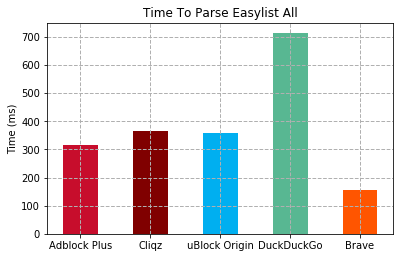

In [27]:
time2parse_medians = pd.DataFrame({
    'adblocker': [abp.label, cliqz.label, ublock.label, duck.label, brave.label],
    'Time to parse Easylist All': [abp.parsingTime, cliqz.parsingTime, ublock.parsingTime, duck.parsingTime, brave.parsingTime]
})

barplot(
    time2parse_medians, 
    'Time to parse Easylist All', 
    ylabel="Time (ms)", 
    color=[abp.color, ublock.color, cliqz.color, duck.color, brave.color], 
    save=True
)

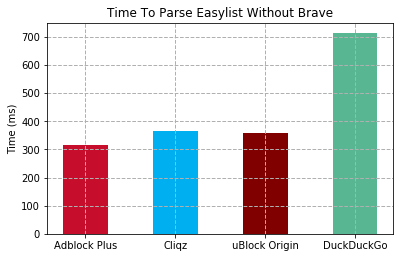

In [28]:
time2parse_medians = pd.DataFrame({
    'adblocker': [abp.label, cliqz.label, ublock.label, duck.label],
    'Time to parse Easylist Without Brave': [abp.parsingTime, cliqz.parsingTime, ublock.parsingTime, duck.parsingTime]
})

barplot(
    time2parse_medians, 
    'Time to parse Easylist Without Brave', 
    ylabel="Time (ms)", 
    color=[abp.color, cliqz.color, ublock.color, duck.color], 
    save=True
)